In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

## Analiza obelezja

In [2]:
df = pd.read_csv('C:\\Users\\joldi\\Downloads\\GuangzhouPM20100101_20151231.csv')
df.head()

,No,year,month,day,hour,season,PM_City Station,PM_5th Middle School,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,1,2010,1,1,0,4.0,NaN,NaN,NaN,9.4,76.0,1015.1,13.5,NW,0.8,0.0,0.0
1,2,2010,1,1,1,4.0,NaN,NaN,NaN,10.2,83.0,1015.2,13.0,cv,0.5,0.0,0.0
2,3,2010,1,1,2,4.0,NaN,NaN,NaN,10.4,87.0,1015.0,12.5,NW,0.6,0.3,0.3
3,4,2010,1,1,3,4.0,NaN,NaN,NaN,10.2,89.0,1014.9,12.0,NW,1.4,0.6,0.9
4,5,2010,1,1,4,4.0,NaN,NaN,NaN,10.4,91.0,1014.6,11.8,NE,0.6,0.7,1.6


In [3]:
df.shape

(52584, 17)

In [4]:
df.columns

Index(['No', 'year', 'month', 'day', 'hour', 'season', 'PM_City Station',
       'PM_5th Middle School', 'PM_US Post', 'DEWP', 'HUMI', 'PRES', 'TEMP',
       'cbwd', 'Iws', 'precipitation', 'Iprec'],
      dtype='object')

In [5]:
df.dtypes

No                        int64
year                      int64
month                     int64
day                       int64
hour                      int64
season                  float64
PM_City Station         float64
PM_5th Middle School    float64
PM_US Post              float64
DEWP                    float64
HUMI                    float64
PRES                    float64
TEMP                    float64
cbwd                     object
Iws                     float64
precipitation           float64
Iprec                   float64
dtype: object

In [6]:
df.info

<bound method DataFrame.info of           No  year  month  day  hour  season  PM_City Station  \
0          1  2010      1    1     0     4.0              NaN   
1          2  2010      1    1     1     4.0              NaN   
2          3  2010      1    1     2     4.0              NaN   
3          4  2010      1    1     3     4.0              NaN   
4          5  2010      1    1     4     4.0              NaN   
...      ...   ...    ...  ...   ...     ...              ...   
52579  52580  2015     12   31    19     4.0             59.0   
52580  52581  2015     12   31    20     4.0             58.0   
52581  52582  2015     12   31    21     4.0             60.0   
52582  52583  2015     12   31    22     4.0             60.0   
52583  52584  2015     12   31    23     NaN             63.0   

       PM_5th Middle School  PM_US Post  DEWP  HUMI         PRES  TEMP cbwd  \
0                       NaN         NaN   9.4  76.0  1015.100000  13.5   NW   
1                       NaN  

In [7]:
df.isnull().sum()/df.shape[0] * 100

No                       0.000000
year                     0.000000
month                    0.000000
day                      0.000000
hour                     0.000000
season                   0.001902
PM_City Station         38.475582
PM_5th Middle School    59.883234
PM_US Post              38.475582
DEWP                     0.001902
HUMI                     0.001902
PRES                     0.001902
TEMP                     0.001902
cbwd                     0.001902
Iws                      0.001902
precipitation            0.001902
Iprec                    0.001902
dtype: float64

In [8]:
df.isna().sum()

No                          0
year                        0
month                       0
day                         0
hour                        0
season                      1
PM_City Station         20232
PM_5th Middle School    31489
PM_US Post              20232
DEWP                        1
HUMI                        1
PRES                        1
TEMP                        1
cbwd                        1
Iws                         1
precipitation               1
Iprec                       1
dtype: int64

In [9]:
df.drop(['PM_City Station', 'PM_5th Middle School', 'No'], axis = 1, inplace = True)

In [10]:
df.isnull().sum()/df.shape[0] * 100

year              0.000000
month             0.000000
day               0.000000
hour              0.000000
season            0.001902
PM_US Post       38.475582
DEWP              0.001902
HUMI              0.001902
PRES              0.001902
TEMP              0.001902
cbwd              0.001902
Iws               0.001902
precipitation     0.001902
Iprec             0.001902
dtype: float64

In [11]:
df.describe()

,year,month,day,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec
count,52584.000000,52584.000000,52584.000000,52584.000000,52583.000000,32352.000000,52583.000000,52583.000000,52583.000000,52583.000000,52583.000000,52583.000000,52583.000000
mean,2012.499772,6.523962,15.726609,11.500000,2.491071,50.803938,16.472691,75.846776,1005.369260,21.996151,7.633037,0.241240,1.086764
std,1.707485,3.448452,8.798896,6.922252,1.116979,36.927474,87.665141,89.510026,6.917953,6.782722,11.965554,1.941028,7.441679
min,2010.000000,1.000000,1.000000,0.000000,1.000000,1.000000,-9999.000000,-9999.000000,975.000000,1.700000,0.000000,0.000000,0.000000
25%,2011.000000,4.000000,8.000000,5.750000,1.000000,24.000000,12.400000,66.000000,1000.100000,17.300000,1.800000,0.000000,0.000000
50%,2012.000000,7.000000,16.000000,11.500000,2.000000,43.000000,19.100000,81.000000,1005.200012,23.500000,3.800000,0.000000,0.000000
75%,2014.000000,10.000000,23.000000,17.250000,3.000000,68.000000,23.600000,91.000000,1010.600000,26.800000,8.600000,0.000000,0.000000
max,2015.000000,12.000000,31.000000,23.000000,4.000000,526.000000,27.500000,100.000000,1027.800000,37.400002,214.300000,99.100000,271.900000


In [12]:
df['DEWP'] = df['DEWP'].replace(-9999.000000, np.nan)
df['HUMI'] = df['HUMI'].replace(-9999.000000, np.nan)

In [13]:
df.isna().sum()

year                 0
month                0
day                  0
hour                 0
season               1
PM_US Post       20232
DEWP                 5
HUMI                 5
PRES                 1
TEMP                 1
cbwd                 1
Iws                  1
precipitation        1
Iprec                1
dtype: int64

In [14]:
df['season'].fillna(method='ffill', inplace = True)

In [15]:
df['PRES'].fillna(method='ffill', inplace = True)

In [16]:
df['TEMP'].fillna(method='ffill', inplace = True)

In [17]:
df['Iws'].fillna(df['Iws'].median(), inplace = True)

In [18]:
df['precipitation'].fillna(df['precipitation'].median(), inplace = True)
df['Iprec'].fillna(df['Iprec'].median(), inplace = True)

In [19]:
df['DEWP'].fillna(method='ffill', inplace = True)
df['HUMI'].fillna(method='ffill', inplace = True)

In [20]:
df['cbwd'].fillna(method='ffill', inplace = True)

In [21]:
df.describe()

,year,month,day,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec
count,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,32352.000000,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000
mean,2012.499772,6.523962,15.726609,11.500000,2.491100,50.803938,17.234176,76.614978,1005.369529,21.996014,7.632964,0.241235,1.086743
std,1.707485,3.448452,8.798896,6.922252,1.116988,36.927474,7.339817,17.030177,6.918162,6.782730,11.965452,1.941009,7.441610
min,2010.000000,1.000000,1.000000,0.000000,1.000000,1.000000,-11.700000,12.000000,975.000000,1.700000,0.000000,0.000000,0.000000
25%,2011.000000,4.000000,8.000000,5.750000,1.000000,24.000000,12.400000,66.000000,1000.100000,17.300000,1.800000,0.000000,0.000000
50%,2012.000000,7.000000,16.000000,11.500000,2.000000,43.000000,19.100000,81.000000,1005.200012,23.500000,3.800000,0.000000,0.000000
75%,2014.000000,10.000000,23.000000,17.250000,3.000000,68.000000,23.600000,91.000000,1010.600000,26.800000,8.600000,0.000000,0.000000
max,2015.000000,12.000000,31.000000,23.000000,4.000000,526.000000,27.500000,100.000000,1027.800000,37.400002,214.300000,99.100000,271.900000


In [22]:
df.isna().sum()

year                 0
month                0
day                  0
hour                 0
season               0
PM_US Post       20232
DEWP                 0
HUMI                 0
PRES                 0
TEMP                 0
cbwd                 0
Iws                  0
precipitation        0
Iprec                0
dtype: int64

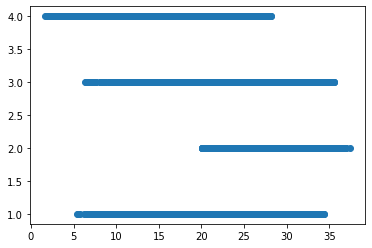

In [23]:
plt.scatter(df['TEMP'], df['season'])
plt.rcParams["figure.figsize"] = (8,8)
plt.show()

<AxesSubplot:xlabel='season', ylabel='TEMP'>

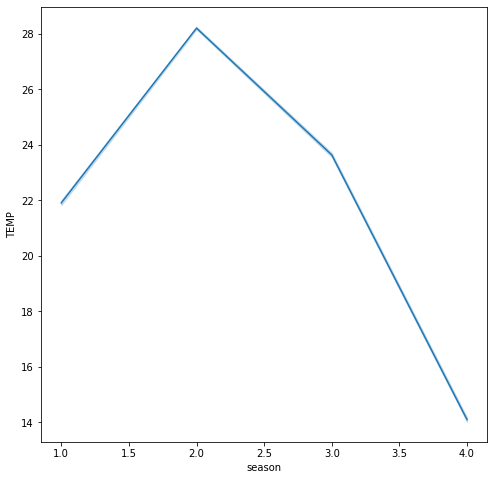

In [24]:
sns.lineplot(data = df, x="season", y = "TEMP")

<AxesSubplot:xlabel='season', ylabel='PM_US Post'>

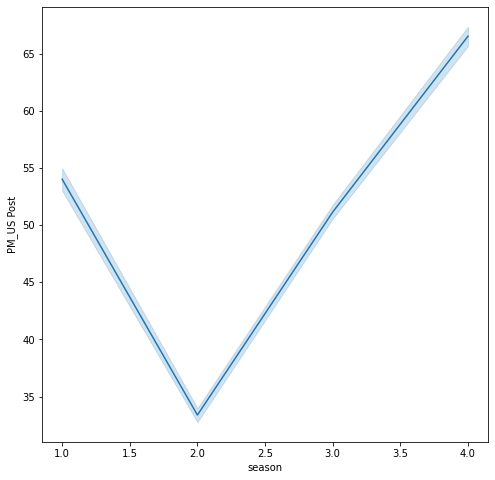

In [25]:
sns.lineplot(data = df, x="season", y = "PM_US Post")

<AxesSubplot:xlabel='TEMP', ylabel='DEWP'>

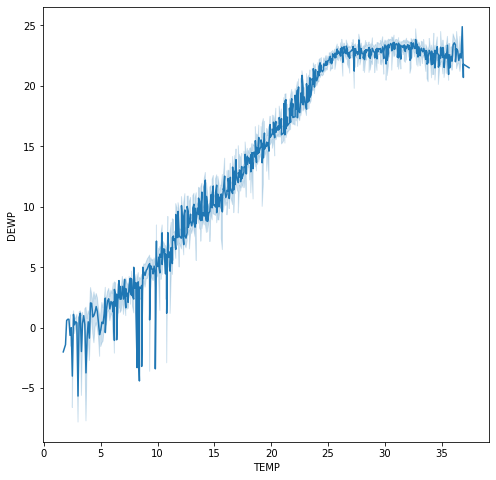

In [26]:
sns.lineplot(data = df, x="TEMP", y = "DEWP")

<AxesSubplot:xlabel='DEWP', ylabel='PRES'>

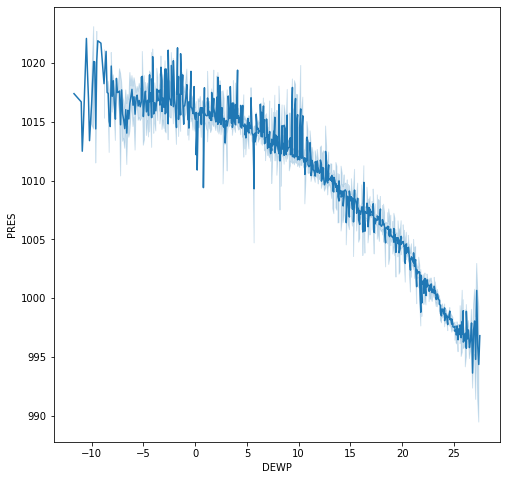

In [27]:
sns.lineplot(data = df, x="DEWP", y = "PRES")

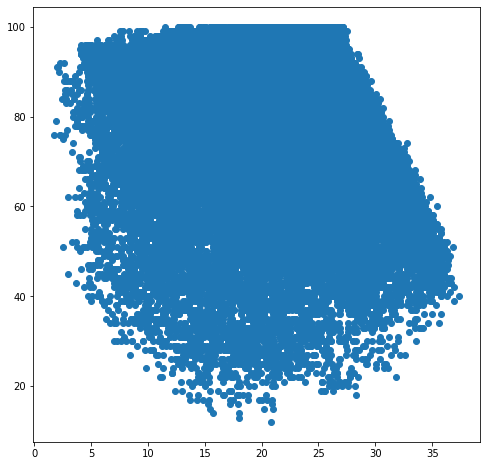

In [28]:
plt.scatter(df['TEMP'], df['HUMI'])
plt.rcParams["figure.figsize"] = (8,8)
plt.show()

<AxesSubplot:xlabel='year', ylabel='PM_US Post'>

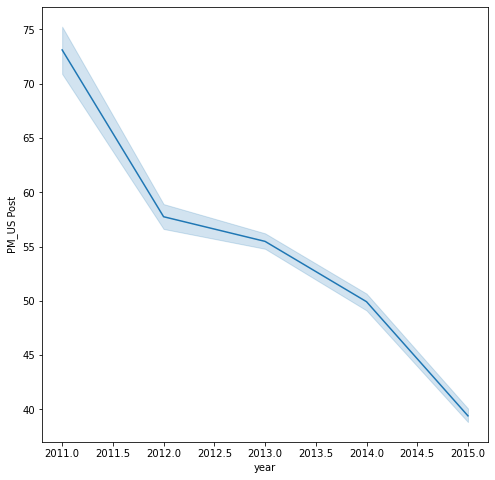

In [29]:
sns.lineplot(data = df, x="year", y = "PM_US Post")

<AxesSubplot:xlabel='year', ylabel='TEMP'>

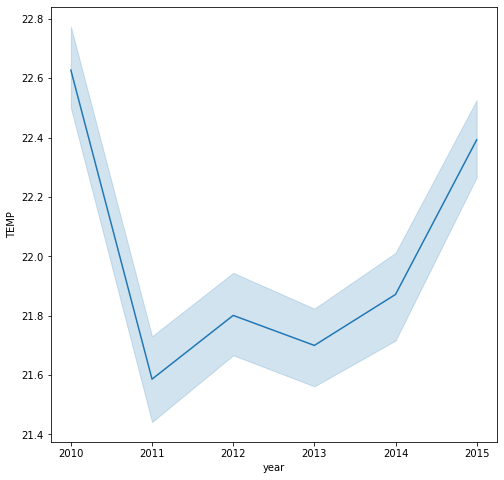

In [30]:
sns.lineplot(data = df, x="year", y = "TEMP")

In [31]:
df['PM_US Post'].describe()

count    32352.000000
mean        50.803938
std         36.927474
min          1.000000
25%         24.000000
50%         43.000000
75%         68.000000
max        526.000000
Name: PM_US Post, dtype: float64

<AxesSubplot:xlabel='PM_US Post'>

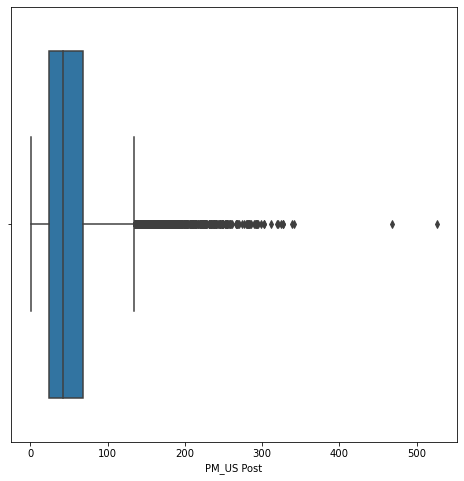

In [32]:
sns.boxplot(x = df['PM_US Post'])

(array([2.0218e+04, 9.6180e+03, 1.9460e+03, 4.2900e+02, 1.0400e+02,
        2.8000e+01, 7.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([  1. ,  53.5, 106. , 158.5, 211. , 263.5, 316. , 368.5, 421. ,
        473.5, 526. ]),
 <BarContainer object of 10 artists>)

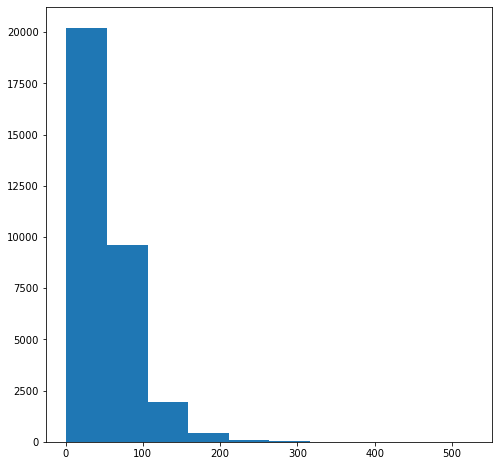

In [33]:
plt.hist(df['PM_US Post'])

In [34]:
df['PM_US Post'].median()

43.0

In [35]:
df.groupby('season').agg(lambda x: x.isnull().sum()/df.shape[0]*100)

,year,month,day,hour,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
season,,,,,,,,,,,,,
1.0,0.0,0.0,0.0,0.0,10.459455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.0,0.0,0.0,0.0,0.0,8.978016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.0,0.0,0.0,0.0,0.0,8.976114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.0,0.0,0.0,0.0,0.0,10.061996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
s1 = df.loc[df['season'] == 1]
s1_mean = s1['PM_US Post'].mean()

In [37]:
s2 = df.loc[df['season'] == 2]
s2_mean = s2['PM_US Post'].mean()
s2_mean

33.381024979476955

In [38]:
s3 = df.loc[df['season'] == 3]
s3_mean = s3['PM_US Post'].mean()
s3_mean

51.13692748091603

In [39]:
s4 = df.loc[df['season'] == 4]
s4_mean = s4['PM_US Post'].mean()
s4_mean

66.52151306382426

In [40]:
df2 = df

In [41]:
df['PM_US Post'] = np.where((df['season'] == 1) & (df['PM_US Post'].isna()), s1_mean, df['PM_US Post'])

In [42]:
df['PM_US Post'] = np.where((df['season'] == 2) & (df['PM_US Post'].isna()), s2_mean, df['PM_US Post'])

In [43]:
df['PM_US Post'] = np.where((df['season'] == 3) & (df['PM_US Post'].isna()), s3_mean, df['PM_US Post'])


In [44]:
df['PM_US Post'] = np.where((df['season'] == 4) & (df['PM_US Post'].isna()), s4_mean, df['PM_US Post'])

In [45]:
df.isna().sum()

year             0
month            0
day              0
hour             0
season           0
PM_US Post       0
DEWP             0
HUMI             0
PRES             0
TEMP             0
cbwd             0
Iws              0
precipitation    0
Iprec            0
dtype: int64

<AxesSubplot:xlabel='PM_US Post'>

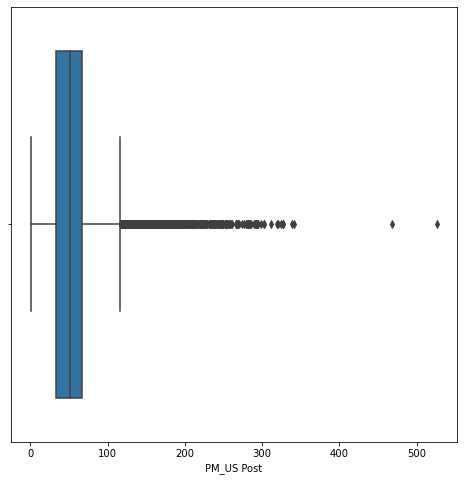

In [46]:
sns.boxplot(x = df['PM_US Post'])

(array([2.9659e+04, 2.0409e+04, 1.9460e+03, 4.2900e+02, 1.0400e+02,
        2.8000e+01, 7.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([  1. ,  53.5, 106. , 158.5, 211. , 263.5, 316. , 368.5, 421. ,
        473.5, 526. ]),
 <BarContainer object of 10 artists>)

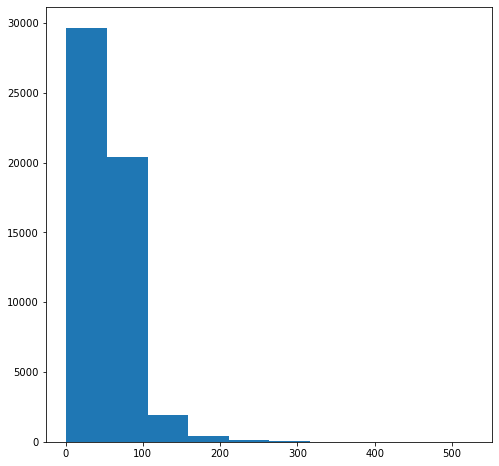

In [47]:
plt.hist(df['PM_US Post'])

In [48]:
correlation_matrix = df.corr()
correlation_matrix['PM_US Post']

year            -0.108887
month           -0.119425
day              0.015864
hour             0.023499
season           0.205296
PM_US Post       1.000000
DEWP            -0.269689
HUMI            -0.035030
PRES             0.268113
TEMP            -0.277067
Iws             -0.071169
precipitation   -0.062879
Iprec           -0.075256
Name: PM_US Post, dtype: float64

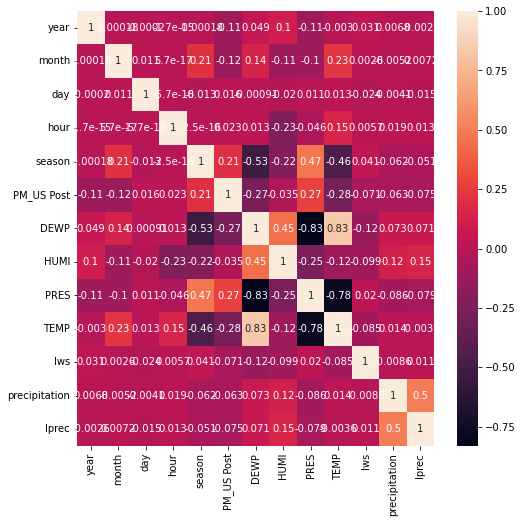

In [49]:
sns.heatmap(correlation_matrix, annot = True)
plt.rcParams["figure.figsize"] = (13,13)
plt.show()

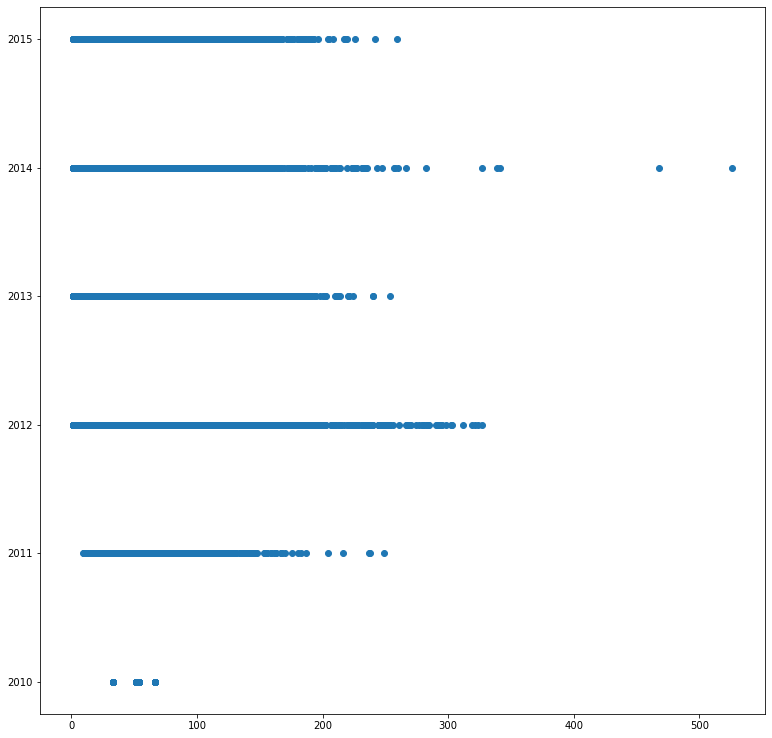

In [50]:
plt.scatter(df['PM_US Post'], df['year'])
plt.rcParams["figure.figsize"] = (8,8)
plt.show()

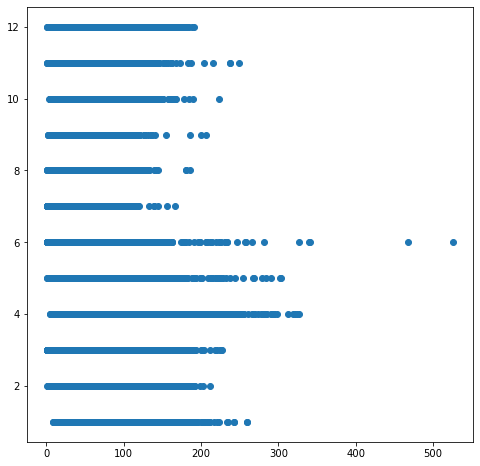

In [51]:
plt.scatter(df['PM_US Post'], df['month'])
plt.rcParams["figure.figsize"] = (8,8)
plt.show()

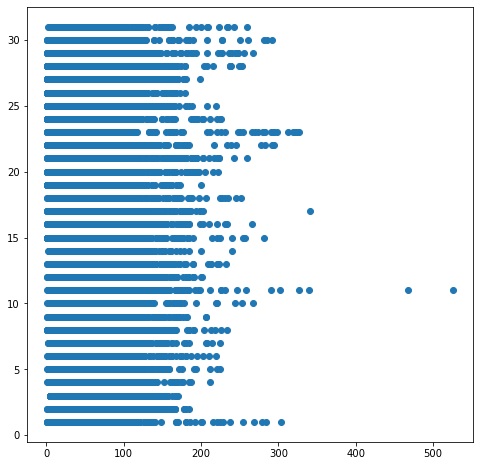

In [52]:
plt.scatter(df['PM_US Post'], df['day'])
plt.rcParams["figure.figsize"] = (8,8)
plt.show()

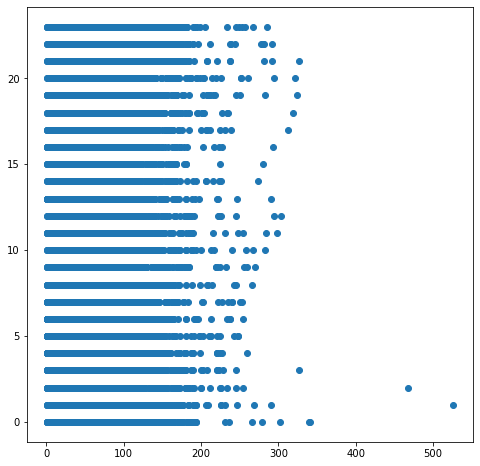

In [53]:
plt.scatter(df['PM_US Post'], df['hour'])
plt.rcParams["figure.figsize"] = (8,8)
plt.show()

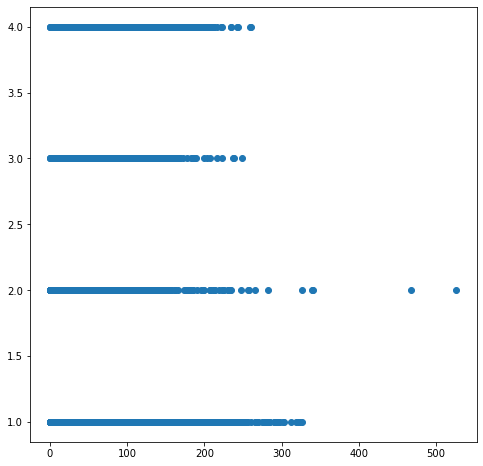

In [54]:
plt.scatter(df['PM_US Post'], df['season'])
plt.rcParams["figure.figsize"] = (8,8)
plt.show()

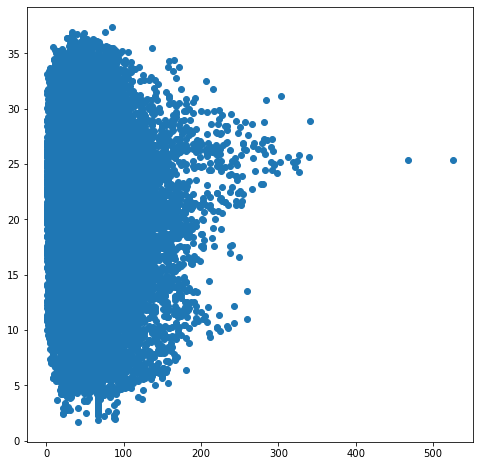

In [55]:
plt.scatter(df['PM_US Post'], df['TEMP'])
plt.rcParams["figure.figsize"] = (8,8)
plt.show()

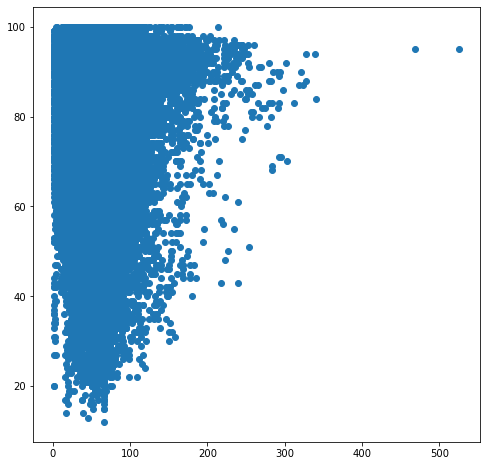

In [56]:
plt.scatter(df['PM_US Post'], df['HUMI'])
plt.rcParams["figure.figsize"] = (8,8)
plt.show()

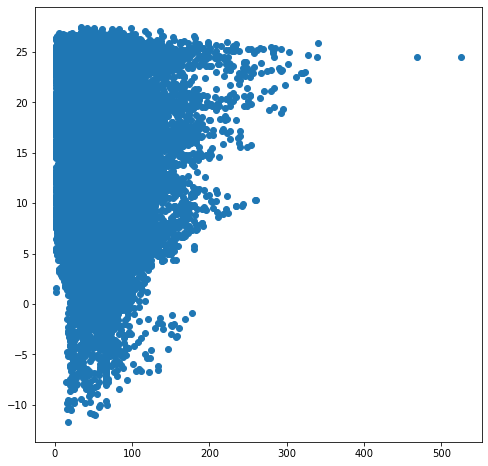

In [57]:
plt.scatter(df['PM_US Post'], df['DEWP'])
plt.rcParams["figure.figsize"] = (8,8)
plt.show()

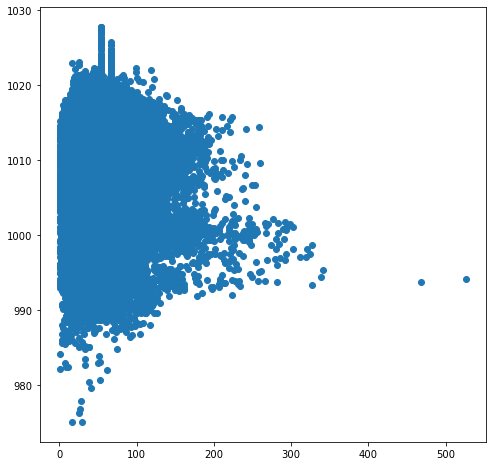

In [58]:
plt.scatter(df['PM_US Post'], df['PRES'])
plt.rcParams["figure.figsize"] = (8,8)
plt.show()

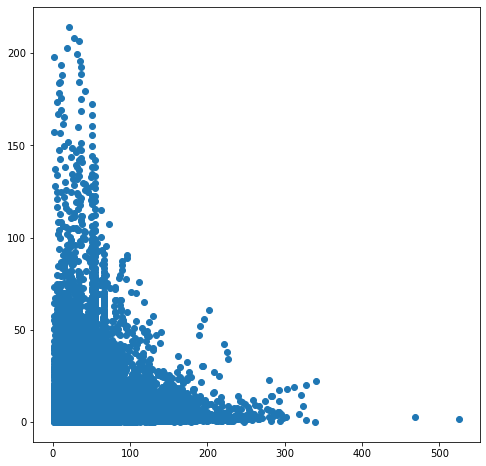

In [59]:
plt.scatter(df['PM_US Post'], df['Iws'])
plt.rcParams["figure.figsize"] = (8,8)
plt.show()

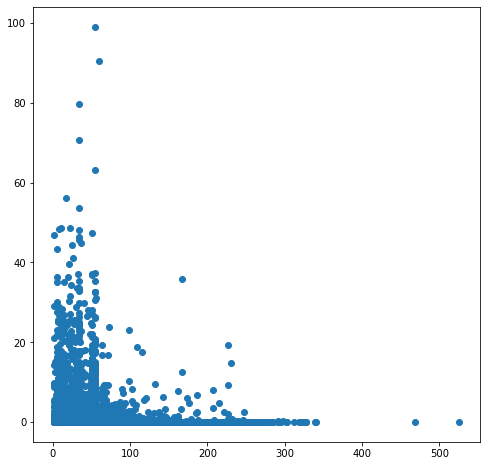

In [60]:
plt.scatter(df['PM_US Post'], df['precipitation'])
plt.rcParams["figure.figsize"] = (8,8)
plt.show()

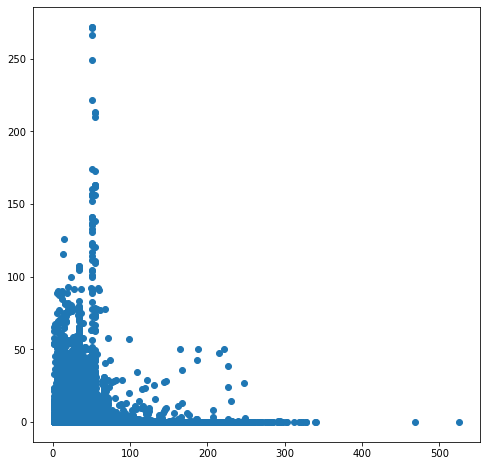

In [61]:
plt.scatter(df['PM_US Post'], df['Iprec'])
plt.rcParams["figure.figsize"] = (8,8)
plt.show()

## Linearna regresija

In [62]:
df['cbwd'].unique()

array(['NW', 'cv', 'NE', 'SE', 'SW'], dtype=object)

In [63]:
df_dummy = pd.get_dummies(df['cbwd'], prefix = 'wdir')
df = pd.concat([df, df_dummy], axis = 1)
df.head()

,year,month,day,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec,wdir_NE,wdir_NW,wdir_SE,wdir_SW,wdir_cv
0,2010,1,1,0,4.0,66.521513,9.4,76.0,1015.1,13.5,NW,0.8,0.0,0.0,0,1,0,0,0
1,2010,1,1,1,4.0,66.521513,10.2,83.0,1015.2,13.0,cv,0.5,0.0,0.0,0,0,0,0,1
2,2010,1,1,2,4.0,66.521513,10.4,87.0,1015.0,12.5,NW,0.6,0.3,0.3,0,1,0,0,0
3,2010,1,1,3,4.0,66.521513,10.2,89.0,1014.9,12.0,NW,1.4,0.6,0.9,0,1,0,0,0
4,2010,1,1,4,4.0,66.521513,10.4,91.0,1014.6,11.8,NE,0.6,0.7,1.6,1,0,0,0,0


In [64]:
df.drop(['cbwd'], axis = 1, inplace = True)
df.head()

,year,month,day,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec,wdir_NE,wdir_NW,wdir_SE,wdir_SW,wdir_cv
0,2010,1,1,0,4.0,66.521513,9.4,76.0,1015.1,13.5,0.8,0.0,0.0,0,1,0,0,0
1,2010,1,1,1,4.0,66.521513,10.2,83.0,1015.2,13.0,0.5,0.0,0.0,0,0,0,0,1
2,2010,1,1,2,4.0,66.521513,10.4,87.0,1015.0,12.5,0.6,0.3,0.3,0,1,0,0,0
3,2010,1,1,3,4.0,66.521513,10.2,89.0,1014.9,12.0,1.4,0.6,0.9,0,1,0,0,0
4,2010,1,1,4,4.0,66.521513,10.4,91.0,1014.6,11.8,0.6,0.7,1.6,1,0,0,0,0


In [65]:
def model_evaluation(y, y_predicted, N, d):
    mse = mean_squared_error(y_val, y_predicted)
    mae = mean_absolute_error(y_val, y_predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_val, y_predicted)
    r2_adj = 1 - (1-r2)*(N-1)/(N-d-1)
    
    #printing values
    print('Mean squared error: ', mse)
    print('Mean absolute error: ', mae)
    print('Root mean squared error: ', rmse)
    print('R2 score: ', r2)
    print('R2 adjusted score: ', r2_adj)
    
    res = pd.concat([pd.DataFrame(y.values), pd.DataFrame(y_predicted)], axis = 1)
    res.columns = ['y', 'y_pred']
    print(res.head(20))

In [66]:
x = df.drop(['PM_US Post'], axis = 1).copy()
y = df['PM_US Post'].copy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state=42)
#x_train1, x_val, y_train1, y_val = train_test_split(x_train, y_train, test_size = 0.17647, random_state = 42)
x_train1, x_val, y_train1, y_val = train_test_split(x_train, y_train, test_size = 0.15, random_state = 42)

x_val.shape[0]


6705

Mean squared error:  713.751853684162
Mean absolute error:  17.699881193423842
Root mean squared error:  26.716134707029795
R2 score:  0.15006894433987417
R2 adjusted score:  0.1496884416683385
            y     y_pred
0   60.000000  46.209638
1   66.521513  49.951195
2   33.381025  37.094404
3   24.000000  44.804293
4   28.000000  44.142524
5   10.000000  40.718287
6   14.000000  36.665070
7   57.000000  64.792508
8   66.521513  75.594556
9   66.521513  82.369955
10  54.000000  45.731485
11  37.000000  46.919233
12  51.136927  50.114757
13  54.012261  59.583408
14  51.136927  44.312867
15  33.381025  44.086316
16  51.136927  49.710689
17  51.136927  42.487643
18  46.000000  42.241839
19  66.521513  61.042280


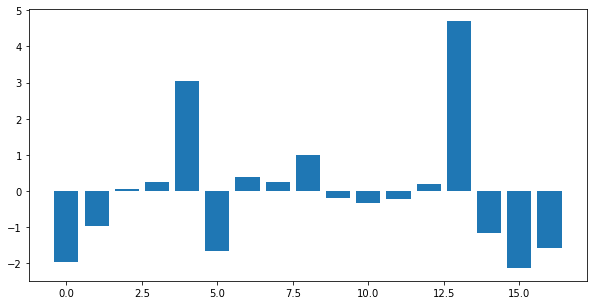

koeficijenti:  [-1.96024089 -0.97585252  0.06060386  0.24381621  3.05448172 -1.65475073
  0.39261675  0.26025529  0.99145974 -0.20177598 -0.33849339 -0.2153263
  0.19294876  4.69455047 -1.16712776 -2.14311096 -1.57726052]


In [67]:
first_regression_model = LinearRegression(fit_intercept = True)

first_regression_model.fit(x_train1, y_train1)

y_predicted = first_regression_model.predict(x_val)

model_evaluation(y_val, y_predicted, x_train1.shape[0], x_train1.shape[1])

plt.figure(figsize = (10, 5))
plt.bar(range(len(first_regression_model.coef_)), first_regression_model.coef_)
plt.show()
print("koeficijenti: ", first_regression_model.coef_)


In [68]:
import statsmodels.api as sm
X = sm.add_constant(x_train1)

model = sm.OLS(y_train1, X.astype('float')).fit()
model.summary()

C:\Users\joldi\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             PM_US Post   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     354.5
Date:                Mon, 09 Jan 2023   Prob (F-statistic):               0.00
Time:                        21:09:54   Log-Likelihood:            -1.8034e+05
No. Observations:               37991   AIC:                         3.607e+05
Df Residuals:                   37974   BIC:                         3.609e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3089.2433    153.888     20.075      0.000    2787.619    3390.868
year             -1.9602      0.087    -22.645      0.000      -2.130      -1.791
month            -0.9759      0.047    -20.547      0.000      -1.069      -0.883
day               0.0606      0.016      3.725      0.000       0.029       0.092
hour              0.2438      0.022     11.301      0.000       0.202       0.286
season            3.0545      0.163     18.740      0.000       2.735       3.374
DEWP             -1.6548      0.224     -7.383      0.000      -2.094      -1.215
HUMI              0.3926      0.055      7.083      0.000       0.284       0.501
PRES              0.2603      0.041      6.360      0.000       0.180       0.340
TEMP              0.9915      0.224      4.419      0.000       0.552       1.431
Iws              -0.2018      0.012    -16.302      0.000      -0.226      -0.178
precipitation    -0.3385      0.082     -4.129      0.000      -0.499      -0.178
Iprec            -0.2153      0.022     -9.827      0.000      -0.258      -0.172
wdir_NE         618.0416     30.786     20.075      0.000     557.700     678.383
wdir_NW         622.5432     30.818     20.201      0.000     562.140     682.947
wdir_SE         616.6815     30.777     20.037      0.000     556.359     677.005
wdir_SW         615.7056     30.788     19.998      0.000     555.361     676.050
wdir_cv         616.2714     30.735     20.051      0.000     556.030     676.513
==============================================================================
Omnibus:                    22188.290   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           324981.301
Skew:                           2.537   Prob(JB):                         0.00
Kurtosis:                      16.400   Cond. No.                     5.33e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.78e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [69]:
numeric_feats = [item for item in x.columns if 'wdir' not in item]
print(numeric_feats)
dummy_feats = [item for item in x.columns if 'wdir' in item]
print(dummy_feats)

['year', 'month', 'day', 'hour', 'season', 'DEWP', 'HUMI', 'PRES', 'TEMP', 'Iws', 'precipitation', 'Iprec']
['wdir_NE', 'wdir_NW', 'wdir_SE', 'wdir_SW', 'wdir_cv']


In [70]:
scaler = StandardScaler()
scaler.fit(x_train[numeric_feats])

x_train1_std = pd.DataFrame(scaler.transform(x_train1[numeric_feats]), columns = numeric_feats)
x_val1_std = pd.DataFrame(scaler.transform(x_val[numeric_feats]), columns = numeric_feats)

x_train1_std = pd.concat([x_train1_std, x_train1[dummy_feats].reset_index(drop = True)], axis = 1)
x_val1_std = pd.concat([x_val1_std, x_val[dummy_feats].reset_index(drop = True)], axis = 1)

x_train1_std.head()

,year,month,day,hour,season,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec,wdir_NE,wdir_NW,wdir_SE,wdir_SW,wdir_cv
0,1.467904,0.716299,1.053874,1.662981,0.456387,1.017381,0.788211,-1.081696,0.662764,0.071125,-0.123637,-0.146251,0,1,0,0,0
1,0.881860,0.426344,-0.988716,-1.230607,-0.438684,0.935680,1.081254,-1.559512,0.441547,-0.635357,4.068481,8.535501,0,0,0,0,1
2,-1.462319,1.006254,-1.215671,1.084263,0.456387,-0.303456,-1.087268,0.641321,0.249825,0.918903,-0.123637,-0.146251,1,0,0,0,0
3,-0.290229,0.136388,0.259533,0.071508,-0.438684,0.990147,-0.735616,-0.994825,1.503391,0.145929,-0.123637,-0.146251,0,0,0,1,0
4,0.881860,1.006254,0.032579,-0.796569,0.456387,-0.099203,0.964037,0.684758,-0.635045,-0.244714,-0.123637,-0.146251,0,1,0,0,0


Mean squared error:  713.7518536841649
Mean absolute error:  17.69988119342392
Root mean squared error:  26.71613470702985
R2 score:  0.15006894433987084
R2 adjusted score:  0.14968844166833517
            y     y_pred
0   60.000000  46.209638
1   66.521513  49.951195
2   33.381025  37.094404
3   24.000000  44.804293
4   28.000000  44.142524
5   10.000000  40.718287
6   14.000000  36.665070
7   57.000000  64.792508
8   66.521513  75.594556
9   66.521513  82.369955
10  54.000000  45.731485
11  37.000000  46.919233
12  51.136927  50.114757
13  54.012261  59.583408
14  51.136927  44.312867
15  33.381025  44.086316
16  51.136927  49.710689
17  51.136927  42.487643
18  46.000000  42.241839
19  66.521513  61.042280


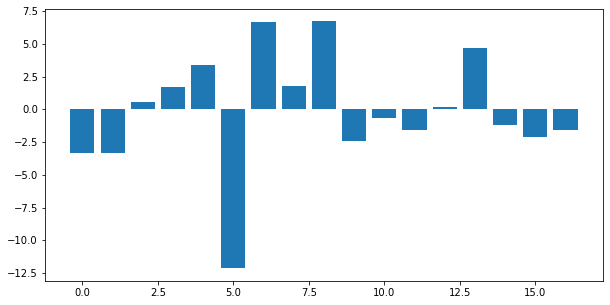

koeficijenti:  [ -3.34486677  -3.36552858   0.53406191   1.68521735   3.41255719
 -12.15220545   6.69894831   1.79744704   6.72274826  -2.42765704
  -0.6701851   -1.59725991   0.19294876   4.69455047  -1.16712776
  -2.14311096  -1.57726052]


In [71]:
regression_model_std = LinearRegression()

regression_model_std.fit(x_train1_std, y_train1)

y_predicted = regression_model_std.predict(x_val1_std)

model_evaluation(y_val, y_predicted, x_train1_std.shape[0], x_train1_std.shape[1])

plt.figure(figsize = (10, 5))
plt.bar(range(len(regression_model_std.coef_)), regression_model_std.coef_)
plt.show()
print("koeficijenti: ", regression_model_std.coef_)

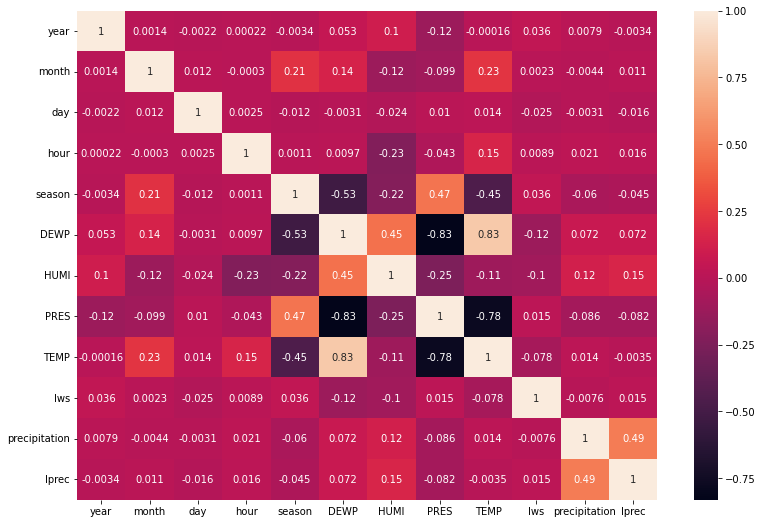

In [72]:
corr_mat = x_train1[numeric_feats].corr()

plt.figure(figsize = (13, 9))
sns.heatmap(corr_mat, annot = True)
plt.show()

['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x0 x13', 'x0 x14', 'x0 x15', 'x0 x16', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x1 x13', 'x1 x14', 'x1 x15', 'x1 x16', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x2 x13', 'x2 x14', 'x2 x15', 'x2 x16', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x3 x13', 'x3 x14', 'x3 x15', 'x3 x16', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x4 x13', 'x4 x14', 'x4 x15', 'x4 x16', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x5 x13', 'x5 x14', 'x5 x15', 'x5 x16', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x6 x1

Mean squared error:  545.7322991962334
Mean absolute error:  15.39086979125718
Root mean squared error:  23.36091392039775
R2 score:  0.35014553479684407
R2 adjusted score:  0.3300596691251826
            y     y_pred
0   60.000000  36.369114
1   66.521513  67.765857
2   33.381025  59.434545
3   24.000000   9.983017
4   28.000000  56.865795
5   10.000000  41.399414
6   14.000000  24.870890
7   57.000000  59.967265
8   66.521513  63.710454
9   66.521513  65.504558
10  54.000000  61.834935
11  37.000000  48.703963
12  51.136927  51.442861
13  54.012261  48.921252
14  51.136927  44.570865
15  33.381025  35.325358
16  51.136927  51.604299
17  51.136927  51.031467
18  46.000000  45.832620
19  66.521513  77.903885


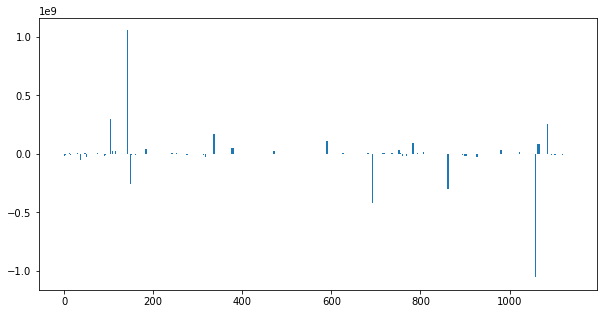

koeficijenti:  [-2.25117750e+00 -1.62162733e+07  2.94117987e+06 ...  0.00000000e+00
  0.00000000e+00  2.22951691e+06]


In [73]:
poly = PolynomialFeatures(degree = 3, interaction_only = False, include_bias = False)
x_inter_train = poly.fit_transform(x_train1_std)
x_inter_test = poly.transform(x_val1_std)

print(poly.get_feature_names())

regression_model_inter = LinearRegression()

regression_model_inter.fit(x_inter_train, y_train1)

y_predicted = regression_model_inter.predict(x_inter_test)

model_evaluation(y_val, y_predicted, x_inter_train.shape[0], x_inter_train.shape[1])

plt.figure(figsize=(10, 5))
plt.bar(range(len(regression_model_inter.coef_)), regression_model_inter.coef_)
plt.show()
print("koeficijenti: ", regression_model_inter.coef_)

Mean squared error:  540.3636139737029
Mean absolute error:  15.303904180554547
Root mean squared error:  23.245722487668626
R2 score:  0.3565385301707118
R2 adjusted score:  0.3366502608120632
            y     y_pred
0   60.000000  37.998805
1   66.521513  68.649170
2   33.381025  55.838340
3   24.000000   9.953297
4   28.000000  56.733443
5   10.000000  41.201185
6   14.000000  24.429486
7   57.000000  59.916874
8   66.521513  62.511217
9   66.521513  66.029976
10  54.000000  61.955772
11  37.000000  49.037165
12  51.136927  50.958852
13  54.012261  53.307968
14  51.136927  45.235292
15  33.381025  37.299770
16  51.136927  50.972801
17  51.136927  51.142213
18  46.000000  46.823351
19  66.521513  77.472524


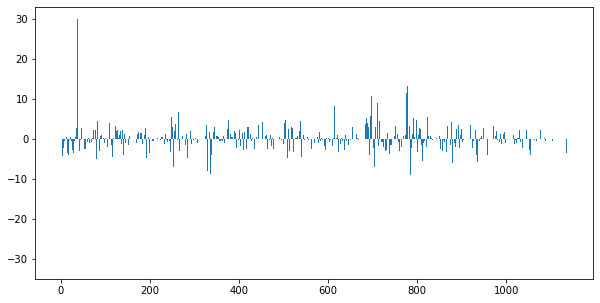

koeficijenti:  [ 0.84871896 15.09723249 -1.88686262 ...  0.          0.
  2.3873309 ]


In [74]:
ridge_model = Ridge(alpha = 5)

ridge_model.fit(x_inter_train, y_train1)

y_predicted = ridge_model.predict(x_inter_test)

model_evaluation(y_val, y_predicted, x_inter_train.shape[0], x_inter_train.shape[1])

plt.figure(figsize = (10, 5))
plt.bar(range(len(ridge_model.coef_)), ridge_model.coef_)
plt.show()
print("koeficijenti: ", ridge_model.coef_)

C:\Users\joldi\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11277420.335583089, tolerance: 3395.2409868698205
  model = cd_fast.enet_coordinate_descent(


Mean squared error:  539.5611486580094
Mean absolute error:  15.144882803278593
Root mean squared error:  23.22845558055915
R2 score:  0.35749410063876375
R2 adjusted score:  0.3376353662930893
            y     y_pred
0   60.000000  47.980240
1   66.521513  66.718837
2   33.381025  45.313111
3   24.000000  11.154452
4   28.000000  57.463642
5   10.000000  41.415512
6   14.000000  25.191200
7   57.000000  62.417050
8   66.521513  68.148095
9   66.521513  64.772705
10  54.000000  61.723942
11  37.000000  51.115496
12  51.136927  49.820248
13  54.012261  58.652906
14  51.136927  47.921164
15  33.381025  38.880432
16  51.136927  52.626874
17  51.136927  50.689507
18  46.000000  45.870185
19  66.521513  75.741926


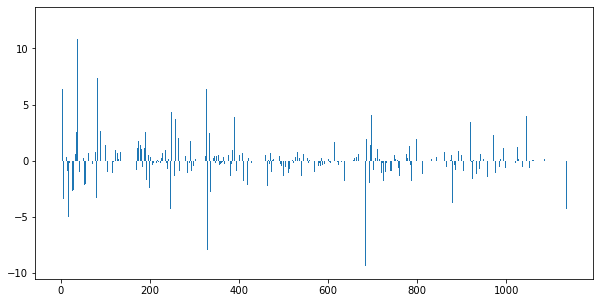

koeficijenti:  [ 0.          2.22654687 -1.41473105 ...  0.          0.
  0.        ]


In [75]:
lasso_model = Lasso(alpha = 0.01)

lasso_model.fit(x_inter_train, y_train1)

y_predicted = lasso_model.predict(x_inter_test)

model_evaluation(y_val, y_predicted, x_inter_train.shape[0], x_inter_train.shape[1])

plt.figure(figsize= (10, 5))
plt.bar(range(len(lasso_model.coef_)), lasso_model.coef_)
plt.show()
print("koeficijenti: ", lasso_model.coef_)

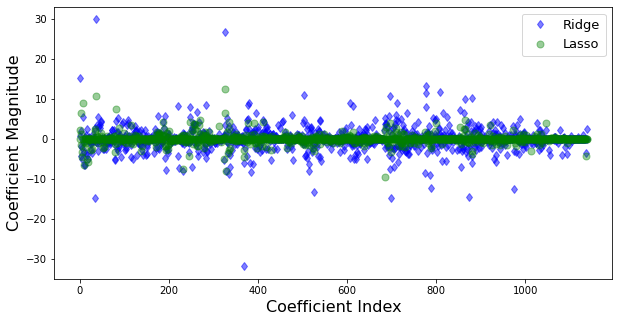

In [76]:
plt.figure(figsize=(10,5))
#plt.plot(regression_model_degree.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'linear',zorder=7) # zorder for ordering the markers
plt.plot(ridge_model.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge') # alpha here is for transparency
plt.plot(lasso_model.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Lasso')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc='best')
plt.show()

In [77]:
import statsmodels.api as sm
X = sm.add_constant(x_train)

model = sm.OLS(y_train, X.astype('float')).fit()
model.summary()

C:\Users\joldi\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             PM_US Post   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     428.0
Date:                Mon, 09 Jan 2023   Prob (F-statistic):               0.00
Time:                        21:10:21   Log-Likelihood:            -2.1189e+05
No. Observations:               44696   AIC:                         4.238e+05
Df Residuals:                   44679   BIC:                         4.240e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3133.0500    141.078     22.208      0.000    2856.534    3409.566
year             -1.9897      0.079    -25.073      0.000      -2.145      -1.834
month            -0.9939      0.043    -22.878      0.000      -1.079      -0.909
day               0.0592      0.015      3.973      0.000       0.030       0.088
hour              0.2481      0.020     12.524      0.000       0.209       0.287
season            3.1164      0.149     20.872      0.000       2.824       3.409
DEWP             -1.6693      0.205     -8.156      0.000      -2.070      -1.268
HUMI              0.3953      0.051      7.803      0.000       0.296       0.495
PRES              0.2666      0.038      7.100      0.000       0.193       0.340
TEMP              1.0032      0.205      4.897      0.000       0.602       1.405
Iws              -0.1974      0.011    -17.420      0.000      -0.220      -0.175
precipitation    -0.3525      0.077     -4.590      0.000      -0.503      -0.202
Iprec            -0.2205      0.021    -10.668      0.000      -0.261      -0.180
wdir_NE         626.7799     28.223     22.208      0.000     571.462     682.098
wdir_NW         631.1699     28.252     22.340      0.000     575.795     686.545
wdir_SE         625.4047     28.216     22.165      0.000     570.101     680.708
wdir_SW         624.4551     28.225     22.125      0.000     569.134     679.776
wdir_cv         625.2405     28.176     22.191      0.000     570.015     680.466
==============================================================================
Omnibus:                    25600.781   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           353528.081
Skew:                           2.492   Prob(JB):                         0.00
Kurtosis:                      15.845   Cond. No.                     7.69e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.83e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [78]:
numeric_feats = [item for item in x.columns if 'wdir' not in item]
print(numeric_feats)
dummy_feats = [item for item in x.columns if 'wdir' in item]
print(dummy_feats)

['year', 'month', 'day', 'hour', 'season', 'DEWP', 'HUMI', 'PRES', 'TEMP', 'Iws', 'precipitation', 'Iprec']
['wdir_NE', 'wdir_NW', 'wdir_SE', 'wdir_SW', 'wdir_cv']


In [79]:
scaler = StandardScaler()
scaler.fit(x_train[numeric_feats])

x_train_std = pd.DataFrame(scaler.transform(x_train[numeric_feats]), columns = numeric_feats)
x_test_std = pd.DataFrame(scaler.transform(x_test[numeric_feats]), columns = numeric_feats)

x_train_std = pd.concat([x_train_std, x_train[dummy_feats].reset_index(drop = True)], axis = 1)
x_test_std = pd.concat([x_test_std, x_test[dummy_feats].reset_index(drop = True)], axis = 1)

x_train_std.head()

,year,month,day,hour,season,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec,wdir_NE,wdir_NW,wdir_SE,wdir_SW,wdir_cv
0,0.881860,1.296209,-0.194376,0.505546,0.456387,-0.548560,-1.204485,0.728196,0.058103,0.827476,-0.123637,-0.146251,1,0,0,0,0
1,0.295815,1.296209,-1.329148,1.662981,0.456387,-0.058352,-0.266746,0.974341,0.013860,1.010330,-0.123637,-0.146251,1,0,0,0,0
2,-0.876274,0.136388,1.053874,-0.941248,-0.438684,1.071849,1.139863,-0.965866,0.559529,-0.552242,-0.123637,-0.146251,0,1,0,0,0
3,-0.290229,0.136388,0.940396,-0.796569,-0.438684,0.908446,0.846820,-3.297012,0.515286,16.536310,0.179408,1.660201,1,0,0,0,0
4,-1.462319,0.426344,0.826919,-0.073172,-0.438684,0.649725,-0.970051,-0.039200,1.282173,-0.469126,-0.123637,-0.146251,0,0,1,0,0


In [80]:
def model_evaluation_test(y, y_predicted, N, d):
    mse = mean_squared_error(y_test, y_predicted)
    mae = mean_absolute_error(y_test, y_predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_predicted)
    r2_adj = 1 - (1-r2)*(N-1)/(N-d-1)
    
    #printing values
    print('Mean squared error: ', mse)
    print('Mean absolute error: ', mae)
    print('Root mean squared error: ', rmse)
    print('R2 score: ', r2)
    print('R2 adjusted score: ', r2_adj)
    
    res = pd.concat([pd.DataFrame(y.values), pd.DataFrame(y_predicted)], axis = 1)
    res.columns = ['y', 'y_pred']
    print(res.head(20))

['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x0 x13', 'x0 x14', 'x0 x15', 'x0 x16', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x1 x13', 'x1 x14', 'x1 x15', 'x1 x16', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x2 x13', 'x2 x14', 'x2 x15', 'x2 x16', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x3 x13', 'x3 x14', 'x3 x15', 'x3 x16', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x4 x13', 'x4 x14', 'x4 x15', 'x4 x16', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x5 x13', 'x5 x14', 'x5 x15', 'x5 x16', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x6 x1

Mean squared error:  651.7579976377662
Mean absolute error:  15.841419555321405
Root mean squared error:  25.52955145782562
R2 score:  0.2976386304888662
R2 adjusted score:  0.2792717097460711
            y     y_pred
0   24.000000  53.698732
1   51.136927  63.097813
2   33.381025  28.187592
3   52.000000  65.182619
4   33.381025  27.563331
5   51.136927  46.464784
6   17.000000  25.855880
7   52.000000  96.789519
8   42.000000  44.246539
9   22.000000  37.503125
10  72.000000  57.527846
11  38.000000  31.220415
12  49.000000  48.785903
13  35.000000  49.425394
14  26.000000  58.616709
15  66.000000  60.977702
16  11.000000  24.702567
17  54.012261  57.491407
18  17.000000  36.912722
19  19.000000  15.451265


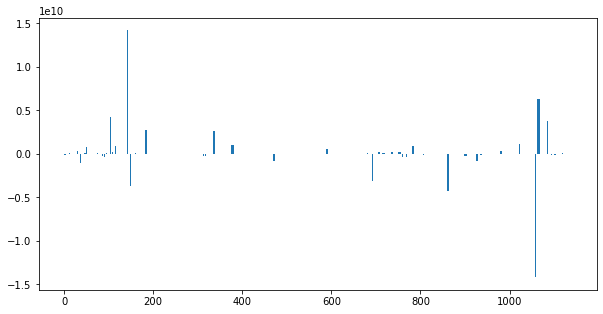

koeficijenti:  [-8.61131824e-01 -1.09672627e+08 -1.21214571e+06 ...  0.00000000e+00
  0.00000000e+00  3.57087251e+07]


In [81]:
poly = PolynomialFeatures(degree = 3, interaction_only = False, include_bias = False)
x_inter_train = poly.fit_transform(x_train_std)
x_inter_test = poly.transform(x_test_std)

print(poly.get_feature_names())

regression_model_inter = LinearRegression()

regression_model_inter.fit(x_inter_train, y_train)

y_predicted = regression_model_inter.predict(x_inter_test)

model_evaluation_test(y_test, y_predicted, x_inter_train.shape[0], x_inter_train.shape[1])

plt.figure(figsize=(10, 5))
plt.bar(range(len(regression_model_inter.coef_)), regression_model_inter.coef_)
plt.show()
print("koeficijenti: ", regression_model_inter.coef_)

C:\Users\joldi\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13071419.320006453, tolerance: 3958.491171511491
  model = cd_fast.enet_coordinate_descent(


Mean squared error:  645.9870515722821
Mean absolute error:  15.653043593272523
Root mean squared error:  25.416275328463886
R2 score:  0.3038576406070681
R2 adjusted score:  0.2856533484923526
            y     y_pred
0   24.000000  51.797235
1   51.136927  62.812228
2   33.381025  28.501179
3   52.000000  64.350834
4   33.381025  32.189551
5   51.136927  43.812729
6   17.000000  29.117398
7   52.000000  90.549305
8   42.000000  41.648736
9   22.000000  37.278458
10  72.000000  54.292669
11  38.000000  33.627535
12  49.000000  49.696768
13  35.000000  54.754341
14  26.000000  58.326245
15  66.000000  59.676533
16  11.000000  23.792421
17  54.012261  54.633835
18  17.000000  37.782108
19  19.000000  17.347287


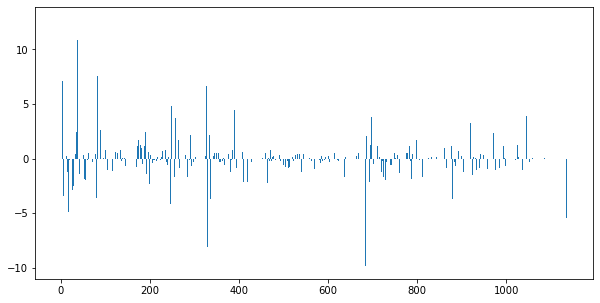

koeficijenti:  [ 0.          1.75822755 -1.85152152 ...  0.          0.
  0.        ]


In [82]:
lasso_model = Lasso(alpha = 0.01)

lasso_model.fit(x_inter_train, y_train)

y_predicted = lasso_model.predict(x_inter_test)

model_evaluation_test(y_test, y_predicted, x_inter_train.shape[0], x_inter_train.shape[1])

plt.figure(figsize= (10, 5))
plt.bar(range(len(lasso_model.coef_)), lasso_model.coef_)
plt.show()
print("koeficijenti: ", lasso_model.coef_)

## KNN

In [83]:
def get_pm25_safety(pm25):
  if pm25 <= 55.4:
    return 'safe'
  elif 55.4 < pm25 <= 150.4:
    return 'unsafe'
  else:
    return 'dangerous'

In [84]:
def get_pm25_safety1(pm25):
  if pm25 <= 55.4:
    return 0
  elif 55.4 < pm25 <= 150.4:
    return 1
  else:
    return 2

In [85]:
df['pm25 safety'] = df['PM_US Post'].apply(get_pm25_safety1)
df.head()

,year,month,day,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec,wdir_NE,wdir_NW,wdir_SE,wdir_SW,wdir_cv,pm25 safety
0,2010,1,1,0,4.0,66.521513,9.4,76.0,1015.1,13.5,0.8,0.0,0.0,0,1,0,0,0,1
1,2010,1,1,1,4.0,66.521513,10.2,83.0,1015.2,13.0,0.5,0.0,0.0,0,0,0,0,1,1
2,2010,1,1,2,4.0,66.521513,10.4,87.0,1015.0,12.5,0.6,0.3,0.3,0,1,0,0,0,1
3,2010,1,1,3,4.0,66.521513,10.2,89.0,1014.9,12.0,1.4,0.6,0.9,0,1,0,0,0,1
4,2010,1,1,4,4.0,66.521513,10.4,91.0,1014.6,11.8,0.6,0.7,1.6,1,0,0,0,0,1


In [86]:
X = df.iloc[:, :-1].copy() # obelezja
y = df.iloc[:, 18].copy() # labele
X

,year,month,day,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec,wdir_NE,wdir_NW,wdir_SE,wdir_SW,wdir_cv
0,2010,1,1,0,4.0,66.521513,9.4,76.0,1015.100000,13.5,0.8,0.0,0.0,0,1,0,0,0
1,2010,1,1,1,4.0,66.521513,10.2,83.0,1015.200000,13.0,0.5,0.0,0.0,0,0,0,0,1
2,2010,1,1,2,4.0,66.521513,10.4,87.0,1015.000000,12.5,0.6,0.3,0.3,0,1,0,0,0
3,2010,1,1,3,4.0,66.521513,10.2,89.0,1014.900000,12.0,1.4,0.6,0.9,0,1,0,0,0
4,2010,1,1,4,4.0,66.521513,10.4,91.0,1014.600000,11.8,0.6,0.7,1.6,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52579,2015,12,31,19,4.0,59.000000,11.0,80.0,1018.299988,14.4,10.9,0.0,0.0,0,1,0,0,0
52580,2015,12,31,20,4.0,58.000000,11.4,82.0,1018.700012,14.5,12.9,0.0,0.0,0,1,0,0,0
52581,2015,12,31,21,4.0,60.000000,11.1,78.0,1019.300000,14.9,14.7,0.0,0.0,0,1,0,0,0
52582,2015,12,31,22,4.0,60.000000,10.4,75.0,1019.500000,14.8,15.9,0.0,0.0,0,1,0,0,0


In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify = y)

In [88]:
df.groupby('pm25 safety').count()

,year,month,day,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec,wdir_NE,wdir_NW,wdir_SE,wdir_SW,wdir_cv
pm25 safety,,,,,,,,,,,,,,,,,,
0,35803,35803,35803,35803,35803,35803,35803,35803,35803,35803,35803,35803,35803,35803,35803,35803,35803,35803
1,16061,16061,16061,16061,16061,16061,16061,16061,16061,16061,16061,16061,16061,16061,16061,16061,16061,16061
2,720,720,720,720,720,720,720,720,720,720,720,720,720,720,720,720,720,720


In [89]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

parameters = {'metric':['euclidean'], 'n_neighbors':[1, 3, 5, 7, 9]}

knn = KNeighborsClassifier()
clf = GridSearchCV(estimator=knn, param_grid=parameters, scoring='accuracy', cv=kfold, refit=True, verbose=3)
clf.fit(X_train, y_train)

print(clf.best_score_)
print(clf.best_params_)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV 1/10] END ..metric=euclidean, n_neighbors=1;, score=0.988 total time=   2.4s
[CV 2/10] END ..metric=euclidean, n_neighbors=1;, score=0.987 total time=   2.3s
[CV 3/10] END ..metric=euclidean, n_neighbors=1;, score=0.985 total time=   2.5s
[CV 4/10] END ..metric=euclidean, n_neighbors=1;, score=0.985 total time=   2.6s
[CV 5/10] END ..metric=euclidean, n_neighbors=1;, score=0.986 total time=   2.3s
[CV 6/10] END ..metric=euclidean, n_neighbors=1;, score=0.983 total time=   2.2s
[CV 7/10] END ..metric=euclidean, n_neighbors=1;, score=0.983 total time=   2.2s
[CV 8/10] END ..metric=euclidean, n_neighbors=1;, score=0.984 total time=   2.2s
[CV 9/10] END ..metric=euclidean, n_neighbors=1;, score=0.985 total time=   2.2s
[CV 10/10] END .metric=euclidean, n_neighbors=1;, score=0.987 total time=   2.2s
[CV 1/10] END ..metric=euclidean, n_neighbors=3;, score=0.989 total time=   2.4s
[CV 2/10] END ..metric=euclidean, n_neighbors=3;

In [90]:
y_pred = clf.predict(X_test)

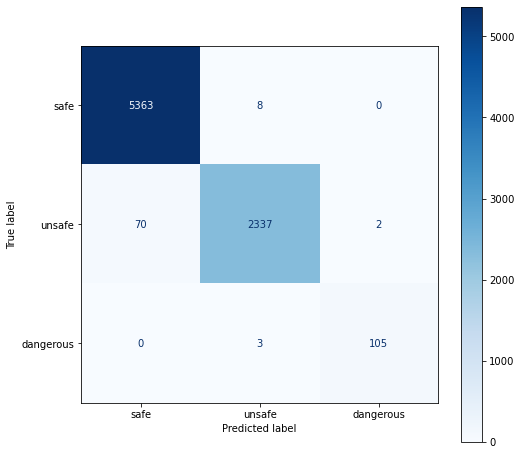

Accuracy:  0.9894776876267748
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5371
           1       1.00      0.97      0.98      2409
           2       0.98      0.97      0.98       108

    accuracy                           0.99      7888
   macro avg       0.99      0.98      0.98      7888
weighted avg       0.99      0.99      0.99      7888



In [91]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, classification_report

conf_mat = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = ['safe', 'unsafe', 'dangerous'])
disp.plot(cmap = "Blues")

plt.show()

print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))